In [1]:
import json
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from ast import literal_eval
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [2]:
from utility.utils import csv_reader
from utility.utils import remove_columns
from utility.utils import missing_data_stats
from utility.utils import advance_missing_data_stat
from utility.visualization import dealing_null_value
from utility.visualization import visualization_list_data
from utility.visualization import visualization_value_count

# sample dataset

In [3]:
data = csv_reader('../data/ML 1.csv')
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Data Description 

**id** - Integer unique id of each movie

**belongs_to_collection** - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

**budget** - Budget of a movie in dollars. 0 values mean unknown.

**genres** - Contains all the Genres Name & TMDB Id in JSON Format

**homepage** - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/ , this is the homepage of Whiplash movie.

**imdb_id** - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/

**original_language** - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french.

**original_title** - The original title of a movie. Title & Original title may differ, if the original title is not in English.

**overview** - Brief description of the movie.

**popularity** - Popularity of the movie in float.

**poster_path** - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/

**production_companies** - All production company name and TMDB id in JSON format of a movie.

**production_countries** - Two digit code and full name of the production company in JSON format.

**release_date** - Release date of a movie in mm/dd/yy format.

**runtime** - Total runtime of a movie in minutes (Integer).

**spoken_languages** - Two digit code and full name of the spoken language.

**status** - Is the movie released or rumored?

**tagline** - Tagline of a movie

**title** - English title of a movie

**Keywords** - TMDB Id and name of all the keywords in JSON format.

**cast** - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

**crew** - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

**revenue** - Total revenue earned by a movie in dollars.


## belongs_to_collection

Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

In [4]:
for collection in data['belongs_to_collection'].values[:5]:
    print(collection)

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
nan
nan
nan


### Some Observation
    - belongs_to_collection we can divide into two features. One is collection name and another is does the movie has collection or not
    - None of the data point contain more then one collection name.

In [5]:
data['belongs_to_collection'] = [literal_eval(i) if not pd.isnull(i) else i for i in data['belongs_to_collection'] ]
data['collection_name'] = data['belongs_to_collection'].apply(lambda x: x[0]['name'] if not pd.isnull(x) else x)
data['has_collection'] = data['belongs_to_collection'].apply(lambda x: len(x) if not pd.isnull(x) else x)

### genres
Contains all the Genres Name & TMDB Id in JSON Format

In [6]:
for genres in data['genres'].values[:5]:
    print(genres)

[{'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


per movie number of genres value


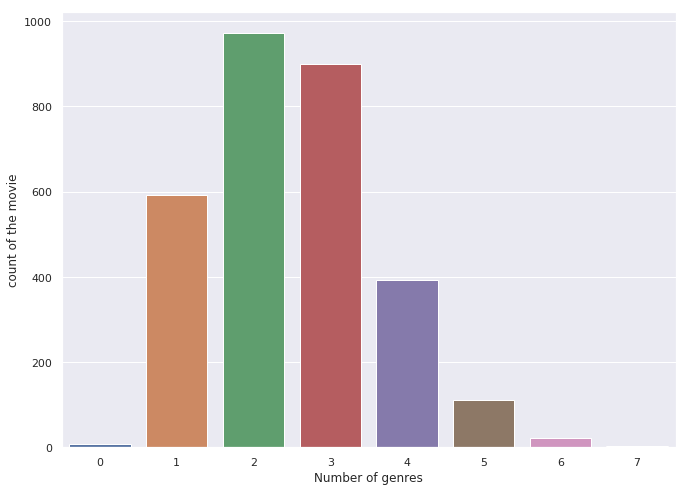

In [7]:
visualization_value_count(data, 'genres')

Visualization of the value of feature genres


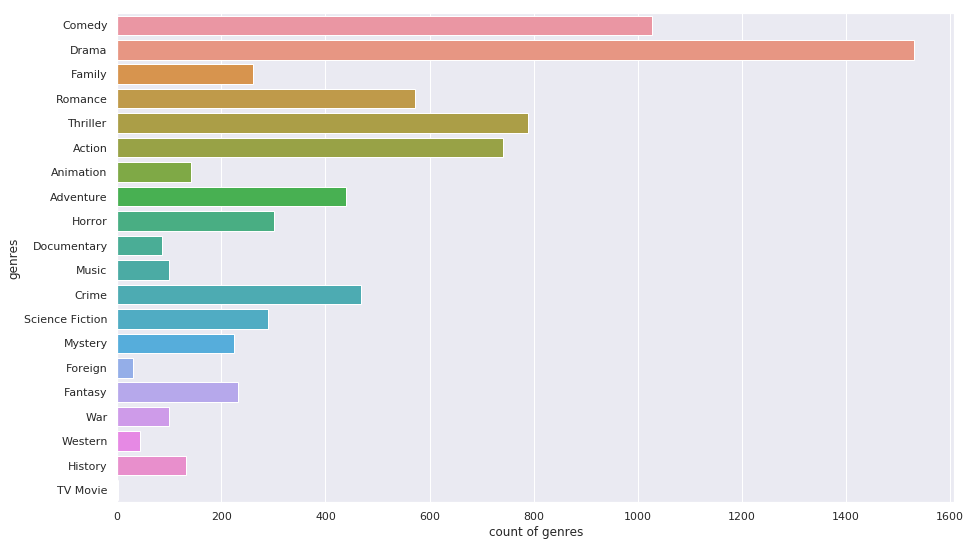

In [8]:
visualization_list_data(data,'genres')

### Observations:
    - For movies, genres distribution is pretty decesent. We will convert genres as categorial feature for the further use.

In [9]:
def get_unique_genres(data):
    data = dealing_null_value(data,'genres')
    unique_genres = [genre.get('name') for genres_list in data.genres for genre in genres_list]
    unique_genres = list(set(unique_genres))
    return unique_genres

def get_genre(lst, default_value):
    default_dict = {}
    default_dict = {k:0 for k in default_value}
    if len(lst):
        for i in lst:
            default_dict[i.get('name')] = 1
    return default_dict

def transform_gerners(data, merge = True):
    total_columns = get_unique_genres(data)
    temp_data = [get_genre(i, total_columns) for i in data.genres.values]
    temp_data = pd.DataFrame(temp_data)
    if merge:
        temp_data = pd.concat([data, temp_data],axis=1)
    return temp_data

def is_english(lst):
    languanges = [i.get('name') for i in lst]
    if 'English' in languanges:
        return 1
    else:
        return 0

def get_keyword_string(lst):
    keyword_list = [i.get('name') for i in lst]
    return ' '.join(keyword_list)

def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

    
def process_date(df):
    df['release_date'] = df['release_date'].apply(lambda x: fix_date(x))
    df['release_date'] = pd.to_datetime(df['release_date'])
       
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    return df

In [10]:
data = transform_gerners(data,merge=True)

### production_companies
    - All production company name and TMDB id in JSON format of a movie.

In [11]:
for i in data.production_companies.values[:5]:
    print(i)

[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
[{'name': 'Walt Disney Pictures', 'id': 2}]
[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
nan
nan


per movie number of production_companies value


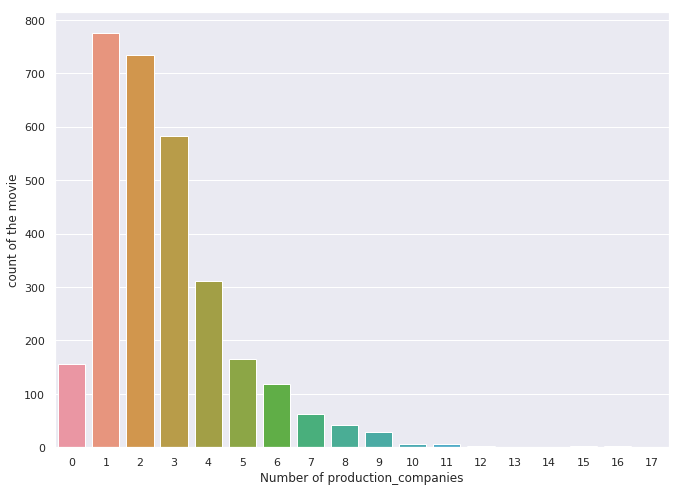

In [12]:
visualization_value_count(data, 'production_companies')

Visualization of the value of feature production_companies
total availabe different values of production_companies are 3695. We will print top 20 values


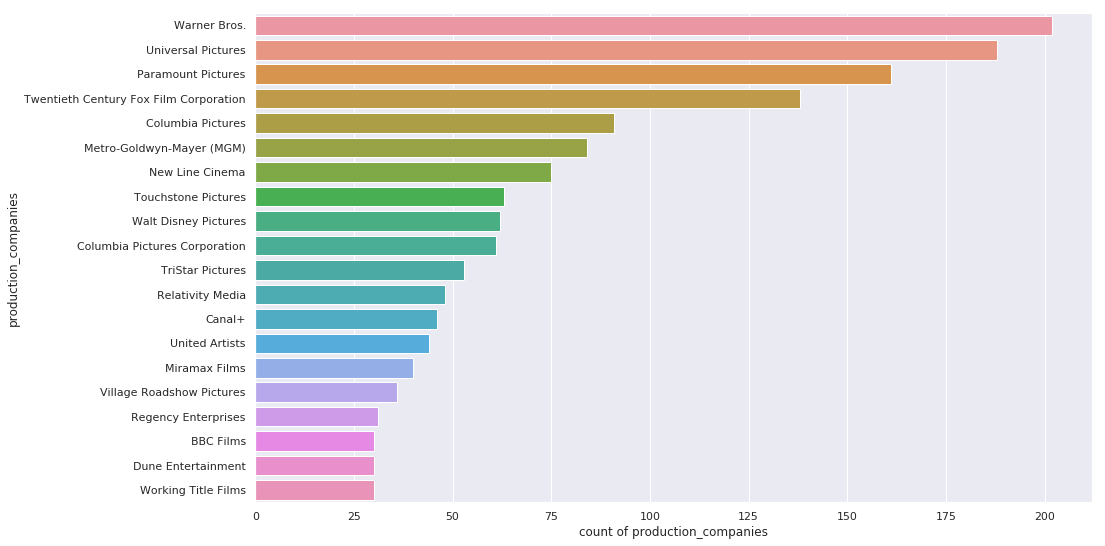

In [13]:
visualization_list_data(data,'production_companies')

### production_countries

In [14]:
for i in data.production_countries.values[:5]:
    print(i)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'IN', 'name': 'India'}]
[{'iso_3166_1': 'KR', 'name': 'South Korea'}]


per movie number of production_countries value


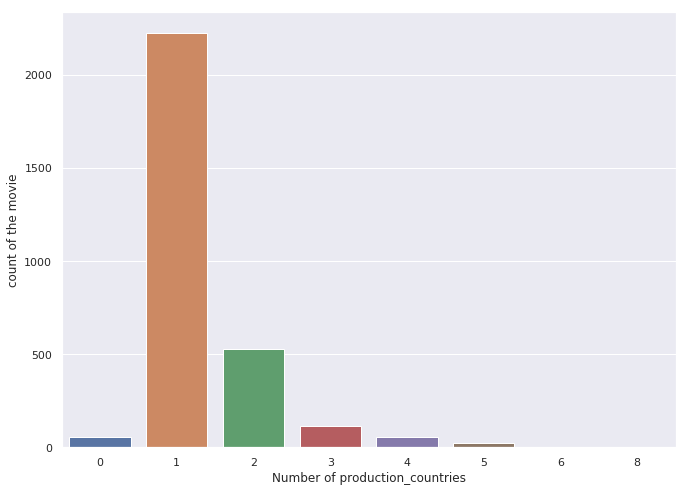

In [15]:
visualization_value_count(data, 'production_countries')

Visualization of the value of feature production_countries
total availabe different values of production_countries are 74. We will print top 20 values


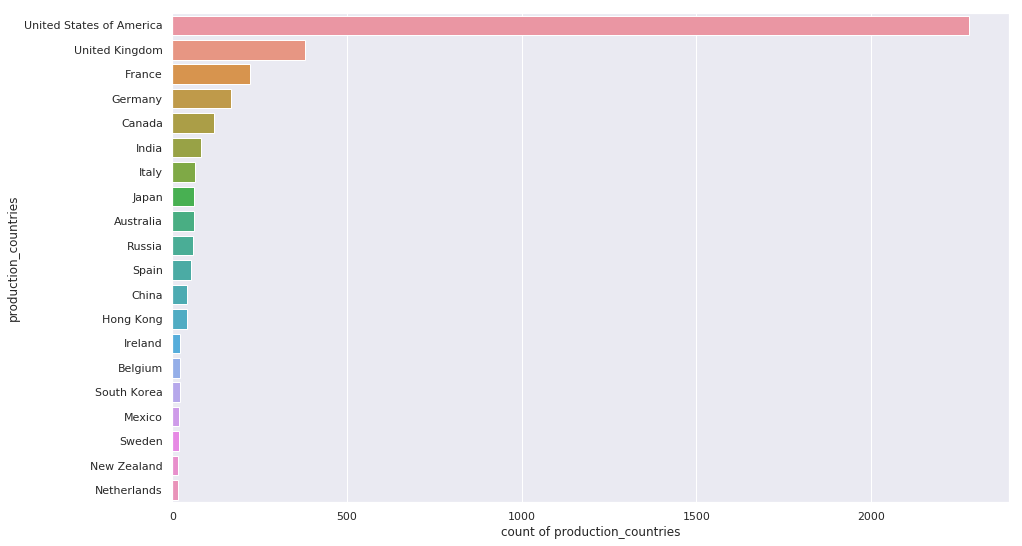

In [16]:
visualization_list_data(data,'production_countries')

### Observation
    - Data is not well distributed. So we will drop production_countries.

### spoken_languages

In [17]:
for i in data.spoken_languages.values[:5]:
    print(i)

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


per movie number of spoken_languages value


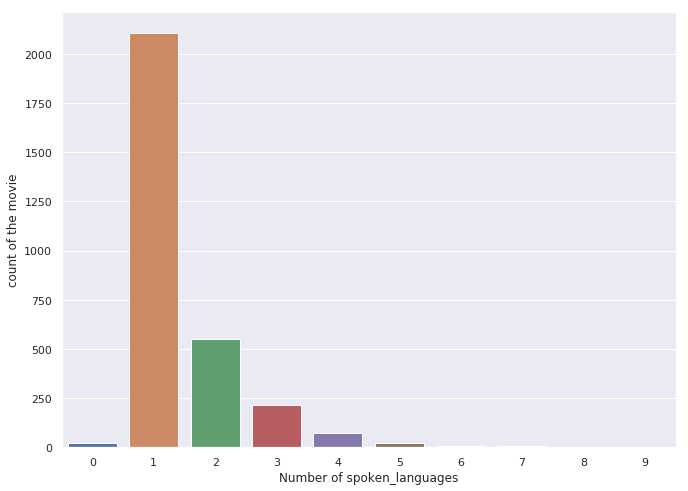

In [18]:
visualization_value_count(data,'spoken_languages')

Visualization of the value of feature spoken_languages
total availabe different values of spoken_languages are 56. We will print top 20 values


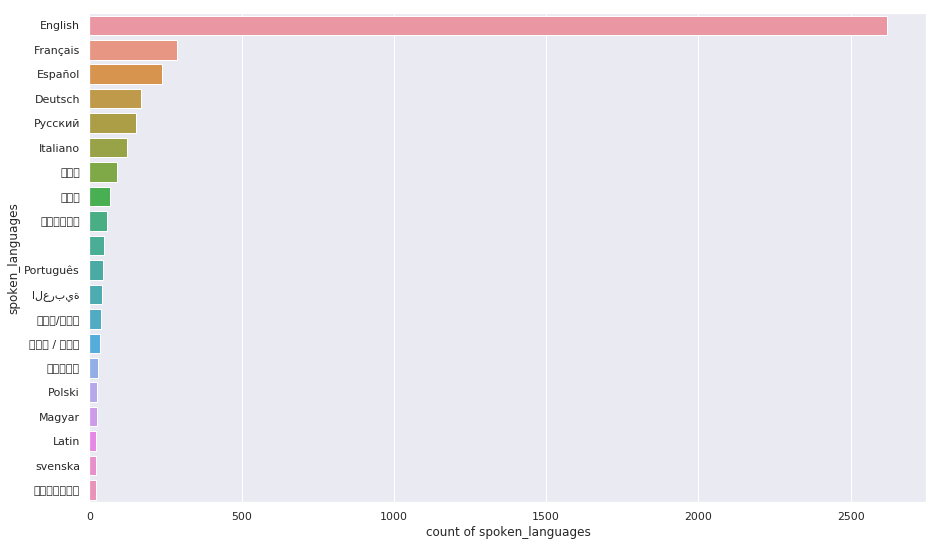

In [14]:
visualization_list_data(data,'spoken_languages')

### Observation
    - We can convert spoken_languages as two feature. 
        - One is feature is spoken_language is english or not.
        - Another feature is number of spoken languages

In [27]:
data = dealing_null_value(data,"spoken_languages")
data['is_english'] = [is_english(i) for i in data.spoken_languages.values]
data['number_of_languages'] = [len(i) for i in data.spoken_languages.values]

### keywords

In [12]:
for i in data.Keywords.values[:5]:
    print(i)

[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
[{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'nerve gas'

per movie number of Keywords value


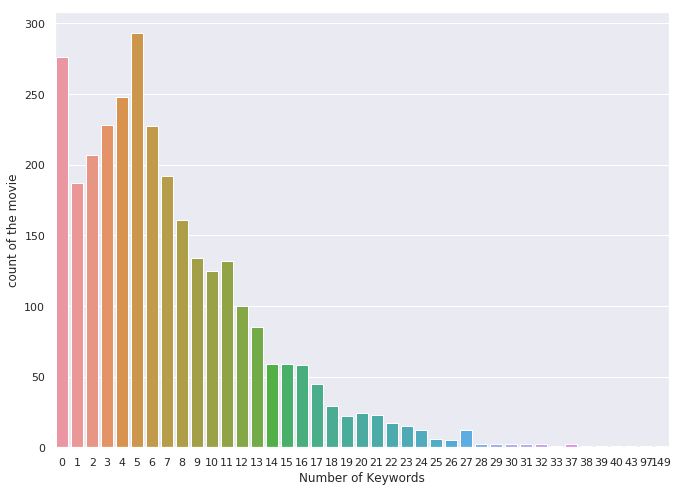

In [15]:
visualization_value_count(data,'Keywords')

Visualization of the value of feature Keywords
total availabe different values of Keywords are 7400. We will print top 20 values


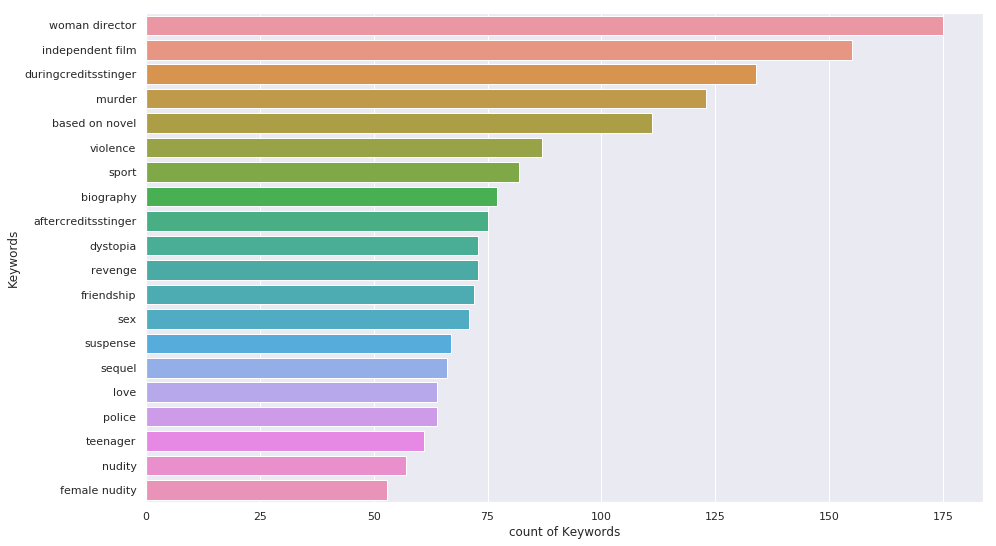

In [16]:
visualization_list_data(data,'Keywords')

### Obeservation:
    - We will convert keywords into text. 

In [32]:
data = dealing_null_value(data,'Keywords')
data['keyword_text'] = data.Keywords.apply(get_keyword_string)
data['number_of_keywords'] = [len(i) for i in data.Keywords.values]

### cast

In [20]:
for i in data.cast.values[:1]:
    temp = literal_eval(i)
    print(f"Sample data is : {temp[0]}\n\nWe have total {len(temp)} features.")

Sample data is : {'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}

We have total 24 features.


per movie number of cast value


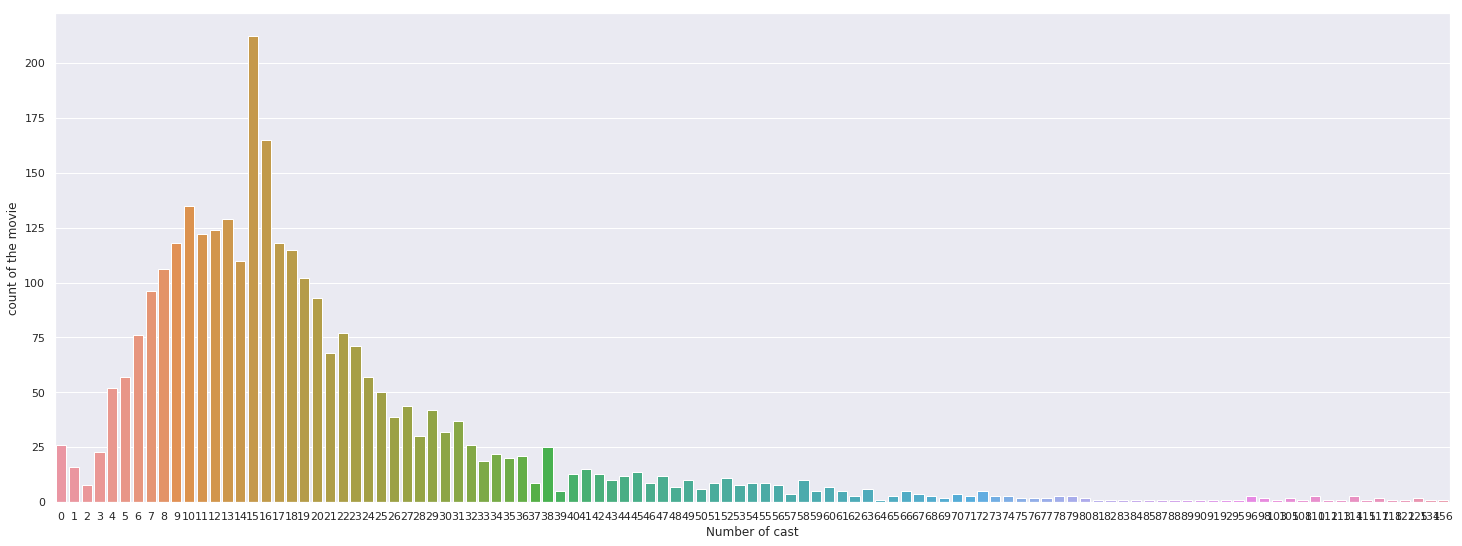

In [18]:
visualization_value_count(data,'cast', figure_size =(25,9))

Visualization of the value of feature cast
total availabe different values of cast are 38588. We will print top 20 values


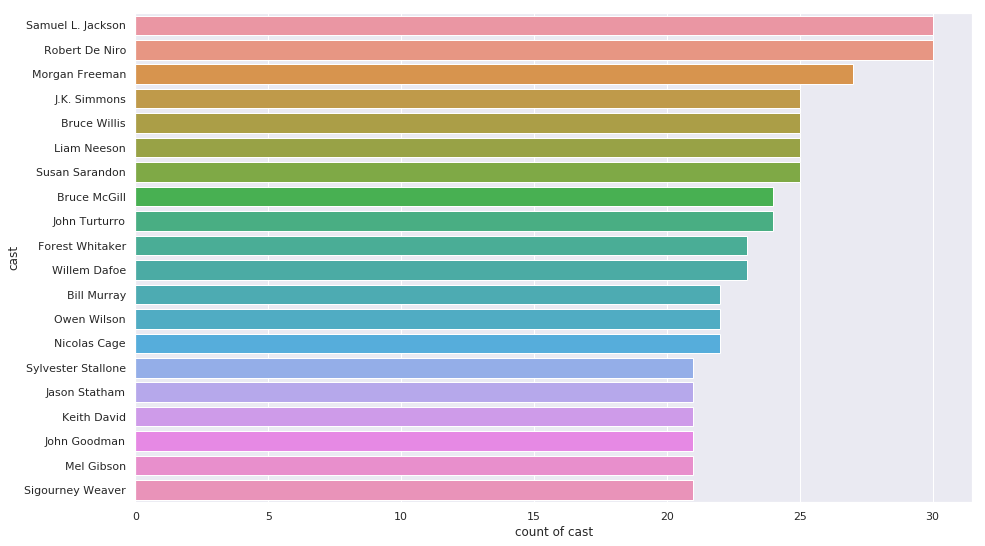

In [19]:
visualization_list_data(data,'cast')

### crew

In [30]:
for i in data.crew.values[:1]:
    temp = literal_eval(i)
    print(f"Sample data is : {temp[0]}\n\nWe have total {len(temp)} features.")

Sample data is : {'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}

We have total 72 features.


In [33]:
data = dealing_null_value(data,'cast')
data = dealing_null_value(data,'crew')
data['cast_size'] = [ len(i) for i in data.cast]
data['crew_size'] = [len(i) for i in data.crew]

### Now, lets us try to understnad numerical values that we have

In [22]:
data[['budget','popularity','runtime','revenue']].describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


### Budget

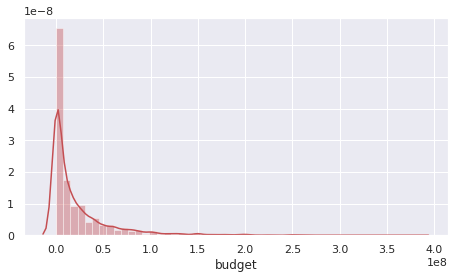

In [69]:
sns.set(rc={'figure.figsize':(7.6,4)})
sns.distplot(data['budget'],color='r')

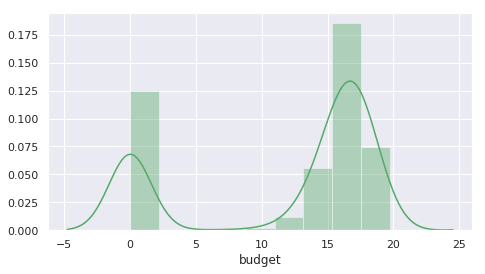

In [70]:
sns.distplot(np.log1p(data['budget']),color='g')

budget value in log form give more information. so we will add that as feature

In [71]:
data['budget_log'] = np.log1p(data['budget'])

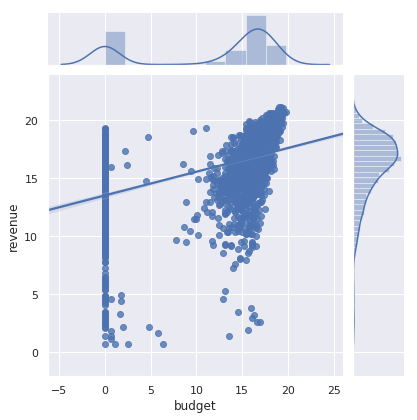

In [72]:
sns.jointplot(x= np.log1p(data['budget']), y=np.log1p(data['revenue']),kind='reg')

### homepage

In [39]:
for i in data.homepage.values[:5]:
    print(i)

nan
nan
http://sonyclassics.com/whiplash/
http://kahaanithefilm.com/
nan


In [47]:
#convert into binary feature
data['has_homepage'] = [1 if not pd.isnull(i) else 0 for i in data.homepage.values]

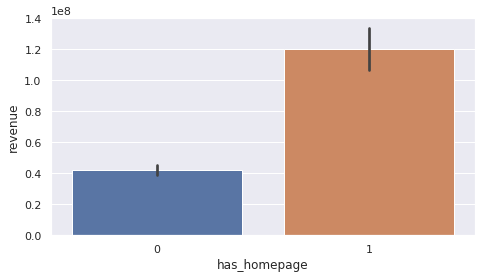

In [73]:
sns.barplot(x='has_homepage',y='revenue',data=data)

### Text data:
    - Here, original_title, overview are text data.
    - imdb_id is unique id for each moview we will not use that as feature further


### popularity

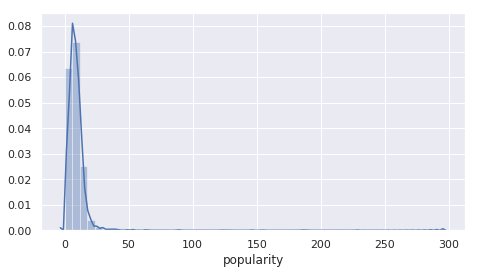

In [74]:
sns.distplot(data['popularity'])

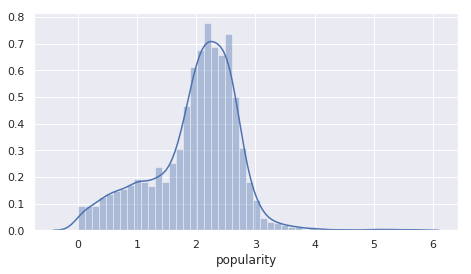

In [76]:
# log distribution for popularity
sns.distplot(np.log1p(data['popularity']))

Here, log distribution of popularity looks pretty decesent. So, we will add that as additional feature

In [77]:
data['popularity_log'] = np.log1p(data['popularity'])

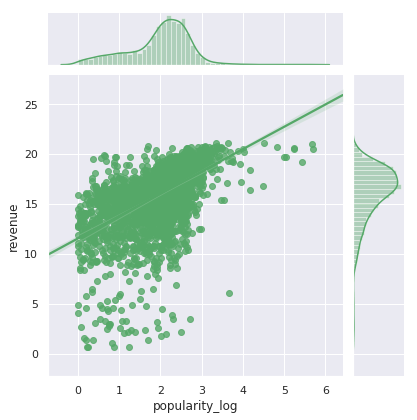

In [87]:
sns.jointplot(x= data['popularity_log'], y=np.log1p(data['revenue']),kind='reg',color='g')

### poster_path

In [89]:
for i in data.poster_path.values[:5]:
    print(i)

/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
/aTXRaPrWSinhcmCrcfJK17urp3F.jpg
/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg


In [90]:
#Basically contain the path for the image so, we can drop that feature
data = data.drop(columns=['poster_path'])

### release_date

In [96]:
data = process_date(data)

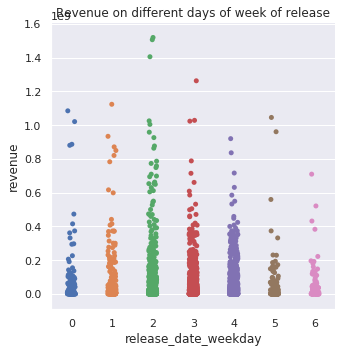

In [102]:
sns.set(rc={'figure.figsize':(10,5)})
sns.catplot(x='release_date_weekday', y='revenue', data=data)
plt.title('Revenue on different days of week of release')
plt.show()

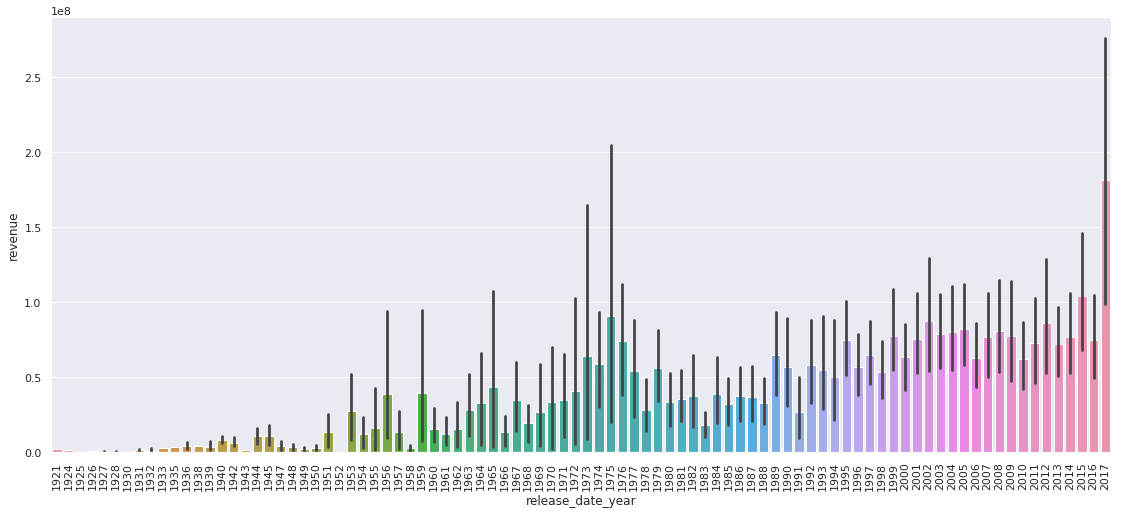

In [110]:
sns.set(rc={'figure.figsize':(19,8)})
sns.(x='release_date_year',y='revenue',data=data)
plt.xticks(rotation='vertical')
plt.show()

### runtime

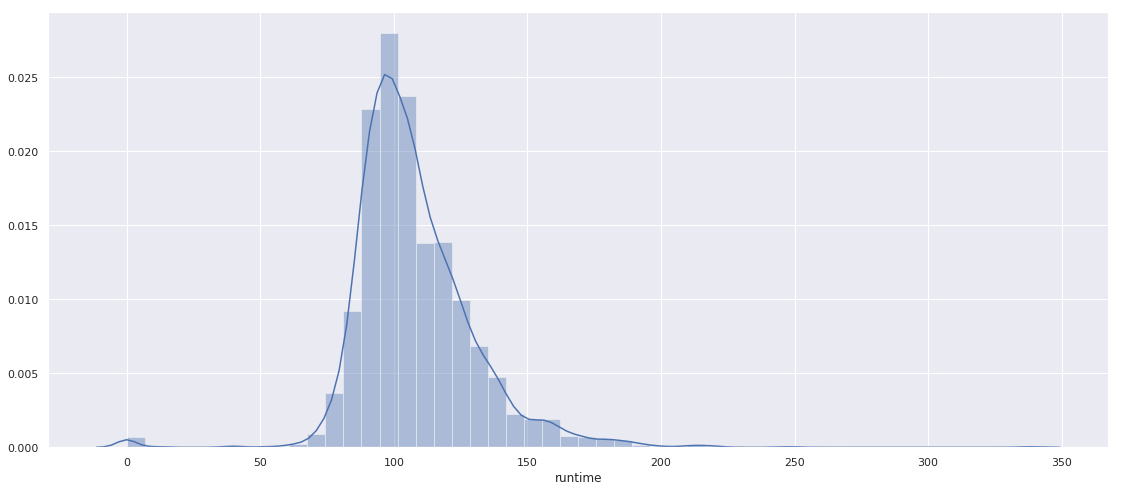

In [112]:
data = dealing_null_value(data, 'runtime',0)
sns.distplot(data['runtime'])

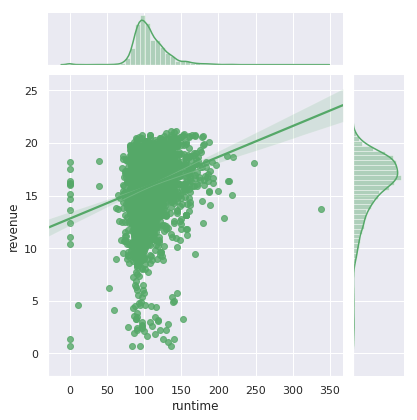

In [115]:
sns.jointplot(x= data['runtime'], y=np.log1p(data['revenue']),kind='reg',color='g')

### revenue

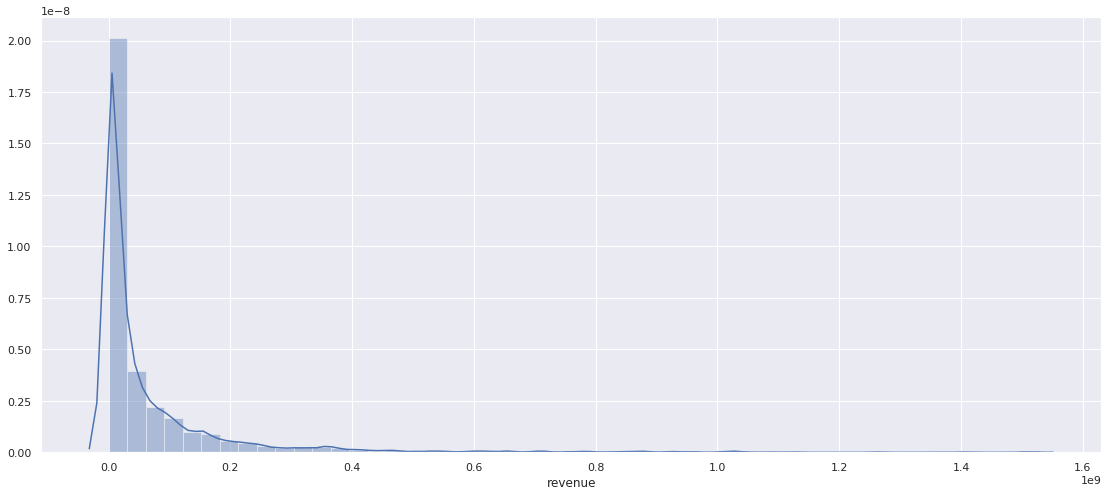

In [116]:
sns.distplot(data['revenue'])

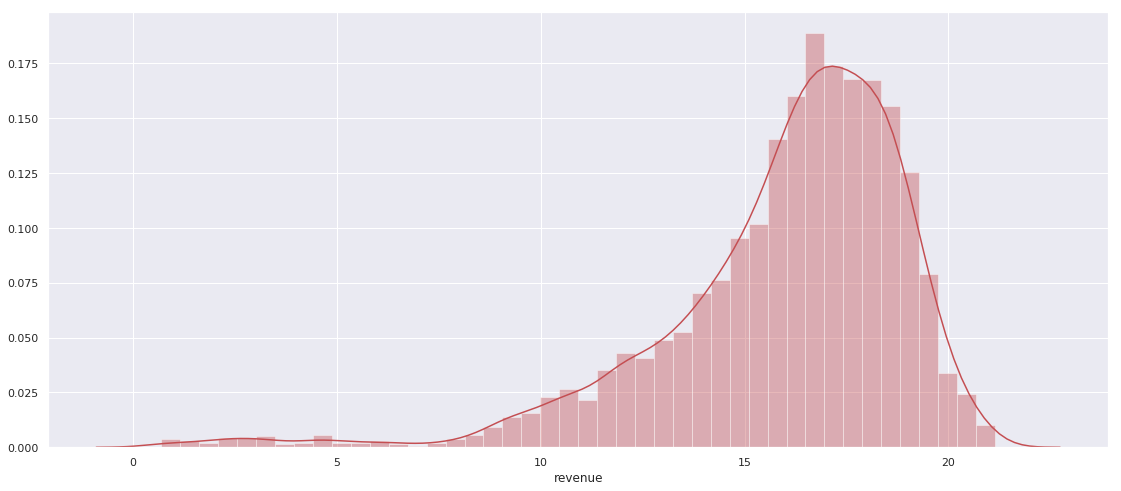

In [119]:
sns.distplot(np.log1p(data['revenue']),color='r')

In [120]:
data.to_csv('../data/processed_dataset.csv',index=False)